# Americal Sign Language

Classifying American Sign Language (ASL) Images to a particular class, digits 0-9 and alphabets A-Z

Feedforward Neural Network with Adam Optimizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from PIL import Image

In [2]:
dataset1 = np.loadtxt("asl_numeric.csv",delimiter= ",")
dataset2 = np.loadtxt("asl_alphabet.csv",delimiter= ",")

dataset = np.vstack((dataset1,dataset2))

np.random.shuffle(dataset)

len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
X = train[:,:-1]
Y = train[:,-1]
c = 36
Y = pd.get_dummies(Y)
Y = Y.to_numpy()

test = dataset[int(0.75*len_dataset):,:]
Xt = test[:,:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()

N,p = X.shape
Nt,pt = Xt.shape
out_neurons = len(Y[0])
print("Number of Features:",p,"\nNumber of classes",c,"\nNumber of Datapoints in Training Set:",N,"\nNumber of Datapoints in Test Set:",Nt)

Number of Features: 7500 
Number of classes 36 
Number of Datapoints in Training Set: 1890 
Number of Datapoints in Test Set: 630


In [3]:
# Data standardization
X = X/255
Xt = Xt/255

In [4]:
# Function to calculate cost
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [5]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [6]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [7]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [8]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,2000,150,out_neurons]

# Initialize parameters
parameters = parameter_init(structure)

100%|██████████| 300/300 [18:11<00:00,  3.64s/it]

Training Cost 0.025395836911984847


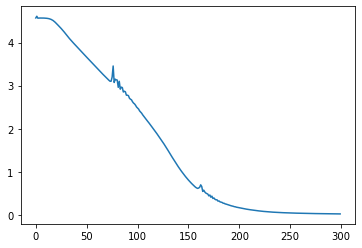

In [9]:
# Implementation of Network using Gradient Descent
epochs = 300
alpha = 0.005
costs = []

t = 0
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

mW3 = np.zeros_like(parameters["W3"])
mb3 = np.zeros_like(parameters["b3"])
vW3 = np.zeros_like(parameters["W3"])
vb3 = np.zeros_like(parameters["b3"])

mW2 = np.zeros_like(parameters["W2"])
mb2 = np.zeros_like(parameters["b2"])
vW2 = np.zeros_like(parameters["W2"])
vb2 = np.zeros_like(parameters["b2"])

mW1 = np.zeros_like(parameters["W1"])
mb1 = np.zeros_like(parameters["b1"])
vW1 = np.zeros_like(parameters["W1"])
vb1 = np.zeros_like(parameters["b1"])


for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates
    t = t + 1     # For Adam
    
    mW3 =  (beta1*mW3) + ((1-beta1)*dL_dW3)
    vW3 =  (beta2*vW3) + ((1-beta2)*np.square(dL_dW3))
    mW3_correct = mW3/(1-np.power(beta1,t))
    vW3_correct = vW3/(1-np.power(beta2,t))
    parameters["W3"] = parameters["W3"] - alpha*(mW3_correct/np.sqrt(vW3_correct + epsilon))
    
    mb3 =  (beta1*mb3) + ((1-beta1)*dL_db3)
    vb3 =  (beta2*vb3) + ((1-beta2)*np.square(dL_db3))
    mb3_correct = mb3/(1-np.power(beta1,t))
    vb3_correct = vb3/(1-np.power(beta2,t))
    parameters["b3"] = parameters["b3"] - alpha*(mb3_correct/np.sqrt(vb3_correct + epsilon))
    
    mW2 =  (beta1*mW2) + ((1-beta1)*dL_dW2)
    vW2 =  (beta2*vW2) + ((1-beta2)*np.square(dL_dW2))
    mW2_correct = mW2/(1-np.power(beta1,t))
    vW2_correct = vW2/(1-np.power(beta2,t))
    parameters["W2"] = parameters["W2"] - alpha*(mW2_correct/np.sqrt(vW2_correct + epsilon))
    
    mb2 =  (beta1*mb2) + ((1-beta1)*dL_db2)
    vb2 =  (beta2*vb2) + ((1-beta2)*np.square(dL_db2))
    mb2_correct = mb2/(1-np.power(beta1,t))
    vb2_correct = vb2/(1-np.power(beta2,t))
    parameters["b2"] = parameters["b2"] - alpha*(mb2_correct/np.sqrt(vb2_correct + epsilon))
    
    mW1 =  (beta1*mW1) + ((1-beta1)*dL_dW1)
    vW1 =  (beta2*vW1) + ((1-beta2)*np.square(dL_dW1))
    mW1_correct = mW1/(1-np.power(beta1,t))
    vW1_correct = vW1/(1-np.power(beta2,t))
    parameters["W1"] = parameters["W1"] - alpha*(mW1_correct/np.sqrt(vW1_correct + epsilon))
    
    mb1 =  (beta1*mb1) + ((1-beta1)*dL_db1)
    vb1 =  (beta2*vb1) + ((1-beta2)*np.square(dL_db1))
    mb1_correct = mb1/(1-np.power(beta1,t))
    vb1_correct = vb1/(1-np.power(beta2,t))
    parameters["b1"] = parameters["b1"] - alpha*(mb1_correct/np.sqrt(vb1_correct + epsilon))
    
    costs.append(compute_cost(h3.T,Y))
plt.plot(costs)
print("Training Cost",costs[-1])

In [10]:
# Prediction
k = 501
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] 	
y= [3.39654738e-06 6.60342176e-07 1.98000640e-07 1.67595314e-04
 2.16323190e-06 4.14790796e-05 8.56569856e-08 1.55298540e-07
 7.56266110e-05 4.61729972e-06 3.07688573e-03 1.37020935e-07
 1.14502665e-04 6.96889913e-06 1.19328719e-05 4.81249442e-05
 2.77111958e-06 2.45643029e-05 2.25068448e-03 1.06706927e-05
 9.67528365e-07 6.65120541e-04 1.53144295e-05 5.90194478e-05
 1.33451080e-05 1.25781074e-03 2.65283825e-04 3.31554428e-07
 2.27170223e-05 1.31800936e-04 6.31128154e-08 1.45158761e-08
 2.16700005e-08 2.27918179e-06 9.91698883e-01 2.38076848e-05]


In [11]:
# Prediction on test set
#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.20837968354266798


In [12]:
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T
YYYY= np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
incorrect_list = []
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        count = count+1
        incorrect_list.append(i)
print("Number of incorrect predictions is",count,"out of",len(YYYY))
print("The accuracy is",(1-count/len(YYYY))*100)

Number of incorrect predictions is 19 out of 630
The accuracy is 96.98412698412699


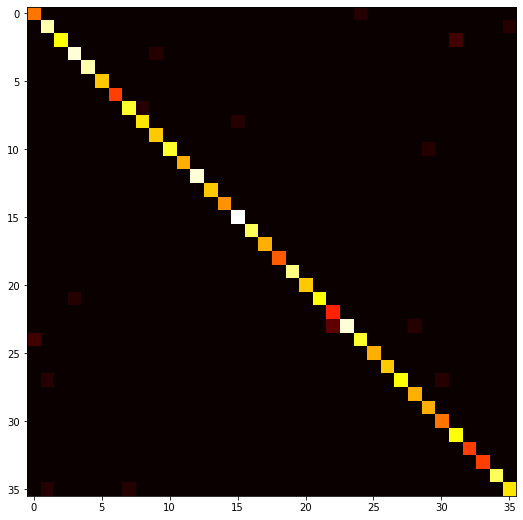

In [13]:
# Confusion Matrix

confusion_matrix = np.zeros((c,c))

for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        confusion_matrix[YYYY[i],y_pred[i]] = confusion_matrix[YYYY[i],y_pred[i]] + 1
    if y_pred[i] == YYYY[i]:
        confusion_matrix[y_pred[i],y_pred[i]] = confusion_matrix[y_pred[i],y_pred[i]] + 1
plt.figure(figsize = (9,9))
plt.imshow(confusion_matrix,cmap = 'hot', interpolation='nearest')
plt.show()

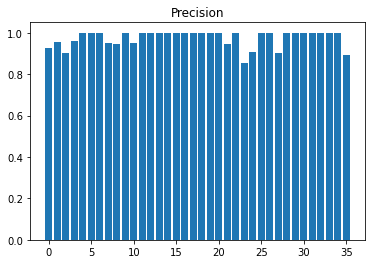

In [14]:
# Precision for each class
precision_values = []
classes = []
for i in range(c):
    val = confusion_matrix[i,i]/(sum(confusion_matrix[i,:]))
    precision_values.append(val)
    classes.append(i)

plt.bar(classes,precision_values)
plt.title("Precision")
plt.show()

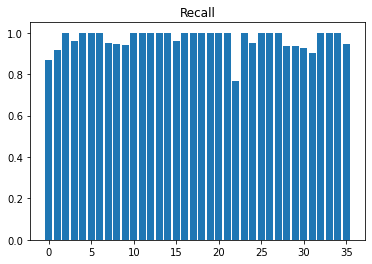

In [15]:
# Recall
recall_values = []
for i in range(c):
    val = confusion_matrix[i,i]/(sum(confusion_matrix[:,i]))
    recall_values.append(val)
plt.bar(classes,recall_values)
plt.title("Recall")
plt.show()

Actual label  27 Predicted as  1 :


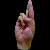

Actual label  7 Predicted as  8 :


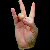

Actual label  21 Predicted as  3 :


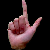

Actual label  27 Predicted as  30 :


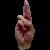

Actual label  23 Predicted as  22 :


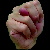

Actual label  23 Predicted as  22 :


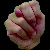

Actual label  23 Predicted as  28 :


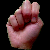

Actual label  35 Predicted as  7 :


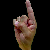

Actual label  0 Predicted as  24 :


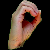

Actual label  10 Predicted as  29 :


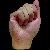

Actual label  24 Predicted as  0 :


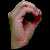

Actual label  2 Predicted as  31 :


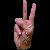

Actual label  24 Predicted as  0 :


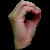

Actual label  1 Predicted as  35 :


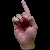

Actual label  3 Predicted as  9 :


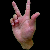

Actual label  35 Predicted as  1 :


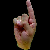

Actual label  2 Predicted as  31 :


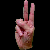

Actual label  8 Predicted as  15 :


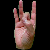

Actual label  23 Predicted as  22 :


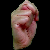

In [16]:
# For displaying the incorrect labels inside Jupyter notebook (PIL image.show() opens the image in external application so this is used)
from IPython.display import display
for i in incorrect_list:
    print("Actual label ",YYYY[i,0],"Predicted as ",y_pred[i,0],":")
    display(Image.fromarray(np.uint8((Xt[i]*255).reshape(50,50,3))))